<a href="https://colab.research.google.com/github/xelothi/CRAF_for_a_paper/blob/main/IDAE_butina_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 18.0 MB/s eta 0:00:00


In [2]:
! pip install mols2grid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.9 MB/s eta 0:00:00


In [4]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, Descriptors, rdFingerprintGenerator, AllChem, MACCSkeys
import numpy as np
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
import mols2grid
from IPython.display import display
from rdkit.Chem.rdFMCS import FindMCS
import matplotlib.image as mpimg

In [5]:
df = pd.read_csv("CRAF_cleaned.csv", index_col=False)
df

,Unnamed: 0,molecule_chembl_id,std_smiles,MW,LogP,NumHDonors,NumHAcceptors,numRotatingBonds,norm_value,pIC50,bioactivity
0,0,CHEMBL431583,COC(=O)c1ccc(-c2[nH]c(-c3ccccc3)nc2-c2ccncc2)cc1,355.397,4.5923,1.0,4.0,4.0,320.0,6.494850,inactive
1,1,CHEMBL303144,C[C@H](Nc1cc(-c2c(-c3cccc(C(F)(F)F)c3)nc(C3CCN...,505.588,6.8080,2.0,5.0,6.0,810.0,6.091515,inactive
2,2,CHEMBL305178,C[C@H](Nc1nccc(-c2c(-c3cccc(C(F)(F)F)c3)nc(C3C...,506.576,6.2030,2.0,6.0,6.0,1000.0,6.000000,inactive
3,3,CHEMBL10,C[S+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc...,377.444,4.6822,1.0,3.0,4.0,330.0,6.481486,inactive
4,4,CHEMBL308939,C[C@H](Nc1nccc(-c2[nH]c(C3CCNCC3)nc2-c2cccc(C(...,492.549,6.1926,3.0,5.0,6.0,3500.0,5.455932,inactive
...,...,...,...,...,...,...,...,...,...,...,...
1086,1086,CHEMBL166031,CC(C)(C)c1cc(NC(=O)Nc2ccc(Oc3ccncc3)cc2)no1,352.394,4.8034,2.0,5.0,4.0,230.0,6.638272,active
1087,1087,CHEMBL2029988,COc1cc2ncnc(Oc3cccc(NC(=O)Nc4cc(C(C)(C)C(F)(F)...,517.464,5.9112,2.0,8.0,7.0,146.0,6.835647,active
1088,1088,CHEMBL361708,Nc1nc(C2=CCNC(=O)c3[nH]c(Br)cc32)c(O)[nH]1,324.138,0.9632,5.0,4.0,1.0,10000.0,5.000000,inactive
1089,1089,CHEMBL296586,O=C1Cc2c([nH]c3ccc(Br)cc23)-c2ccccc2N1,327.181,4.0920,2.0,1.0,0.0,38000.0,4.420216,inactive


Streaming output truncated to the last 5000 lines.
[14:00:53] DEPRECATION WARNING: please use MorganGenerator
[14:00:53] DEPRECATION WARNING: please use MorganGenerator
[14:00:53] DEPRECATION WARNING: please use MorganGenerator
[14:00:53] DEPRECATION WARNING: please use MorganGenerator
[14:00:53] DEPRECATION WARNING: please use MorganGenerator
[14:00:53] DEPRECATION WARNING: please use MorganGenerator
[14:00:53] DEPRECATION WARNING: please use MorganGenerator
[14:00:53] DEPRECATION WARNING: please use MorganGenerator
[14:00:53] DEPRECATION WARNING: please use MorganGenerator
[14:00:53] DEPRECATION WARNING: please use MorganGenerator
[14:00:53] DEPRECATION WARNING: please use MorganGenerator
[14:00:53] DEPRECATION WARNING: please use MorganGenerator
[14:00:53] DEPRECATION WARNING: please use MorganGenerator
[14:00:53] DEPRECATION WARNING: please use MorganGenerator
[14:00:53] DEPRECATION WARNING: please use MorganGenerator
[14:00:53] DEPRECATION WARNING: please use MorganGenerator
[14:0

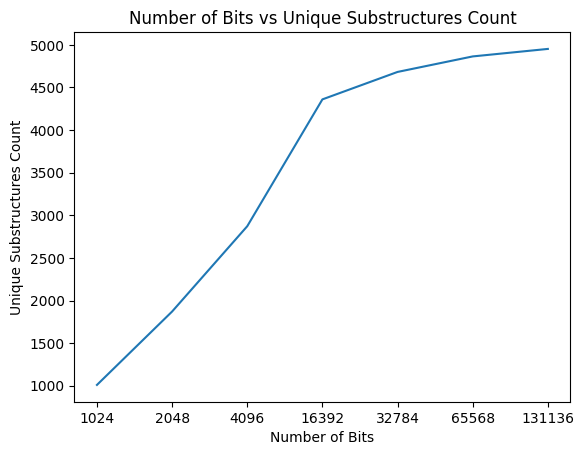

In [6]:
num_of_bits = [1024, 2048, 4096, 16392, 32784,65568,131136]
mols = [Chem.MolFromSmiles(smiles) for smiles in df['std_smiles']]  # Convert SMILES strings to RDKit molecules
uniques = []
for bit in num_of_bits:
    FPs = []
    infos = []
    for mol in mols:
        info = {}
        FPs.append(AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=bit, bitInfo=info, useFeatures=True))
        infos.append(info)
    uniques.append(np.logical_or.reduce(FPs).sum())

fig, ax = plt.subplots()
ax.plot(uniques)

# Set custom tick labels on the X-axis
plt.xticks(range(len(num_of_bits)), num_of_bits)

ax.yaxis.get_major_locator().set_params(integer=True)
plt.xlabel("Number of Bits")
plt.ylabel("Unique Substructures Count")
plt.title("Number of Bits vs Unique Substructures Count")

plt.show()

In [7]:
mols = []
for _, chembl_id, smiles in df[["molecule_chembl_id", "std_smiles"]].itertuples():
    mols.append((Chem.MolFromSmiles(smiles), chembl_id))
MorganFingerprints = []
for m,id in mols:
    MorganFingerprints.append(AllChem.GetMorganFingerprintAsBitVect(m, 3, nBits=32784, useFeatures=True))


[14:02:41] DEPRECATION WARNING: please use MorganGenerator
[14:02:41] DEPRECATION WARNING: please use MorganGenerator
[14:02:41] DEPRECATION WARNING: please use MorganGenerator
[14:02:41] DEPRECATION WARNING: please use MorganGenerator
[14:02:41] DEPRECATION WARNING: please use MorganGenerator
[14:02:41] DEPRECATION WARNING: please use MorganGenerator
[14:02:41] DEPRECATION WARNING: please use MorganGenerator
[14:02:41] DEPRECATION WARNING: please use MorganGenerator
[14:02:41] DEPRECATION WARNING: please use MorganGenerator
[14:02:41] DEPRECATION WARNING: please use MorganGenerator
[14:02:41] DEPRECATION WARNING: please use MorganGenerator
[14:02:41] DEPRECATION WARNING: please use MorganGenerator
[14:02:41] DEPRECATION WARNING: please use MorganGenerator
[14:02:41] DEPRECATION WARNING: please use MorganGenerator
[14:02:41] DEPRECATION WARNING: please use MorganGenerator
[14:02:41] DEPRECATION WARNING: please use MorganGenerator
[14:02:41] DEPRECATION WARNING: please use MorganGenerat

In [8]:
def tan_distance_matrix(fp):
  dist_matrix = []
  num_fps = len(fp)
  for i in range(1, num_fps):
    similarities = DataStructs.BulkTanimotoSimilarity(fp[i], fp[:i])
    dist_matrix.extend([1 - x for x in similarities])
  return dist_matrix

In [9]:
# cluster
def cluster(fp,dist_matrix, cutoff):
  num_fps = len(fp)
  clusters = Butina.ClusterData(dist_matrix, num_fps, cutoff, isDistData=True)
  return clusters

In [10]:
def plot_clusters(fingerprints, dist_matrix, cutoff_range=(0.0, 1.0, 0.1)):
    for cutoff in np.arange(*cutoff_range):
        clusters = cluster(fingerprints, dist_matrix, cutoff)
        fig, ax = plt.subplots(figsize=(15, 4))
        ax.set_title(f"Threshold: {cutoff:3.1f}")
        ax.set_xlabel("Cluster index")
        ax.set_ylabel("Number of molecules")
        ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters], lw=5)
        plt.show()

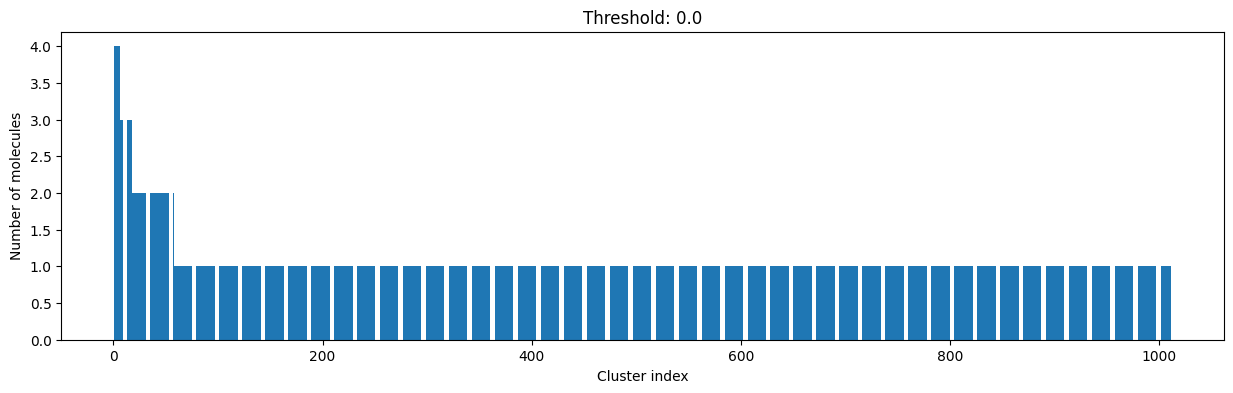

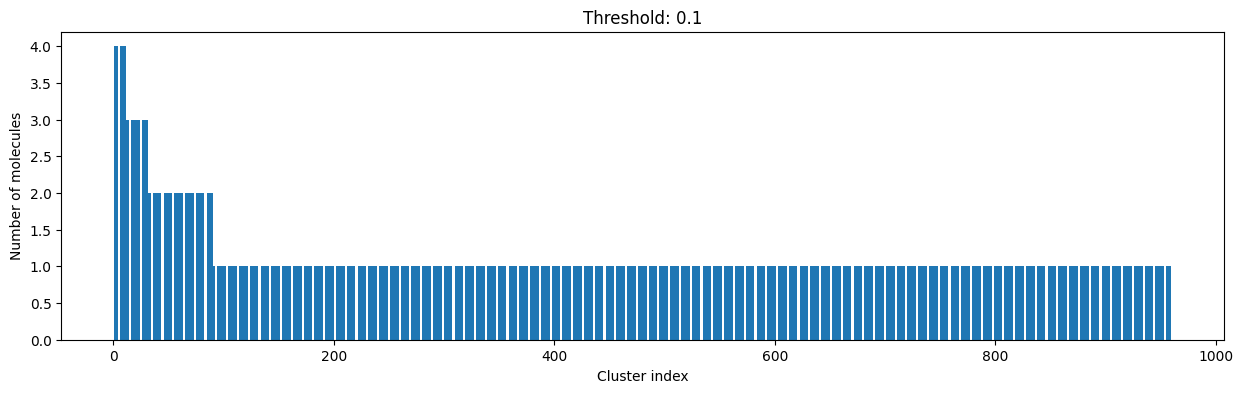

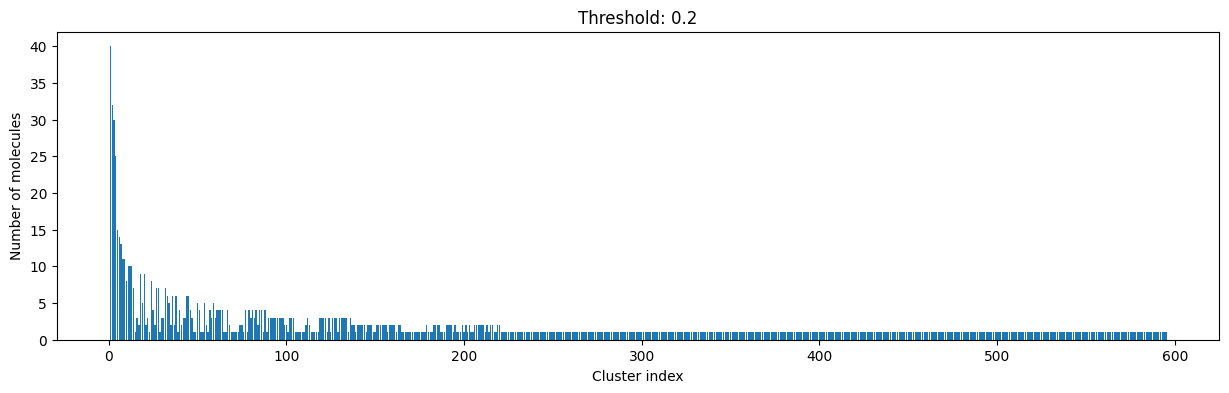

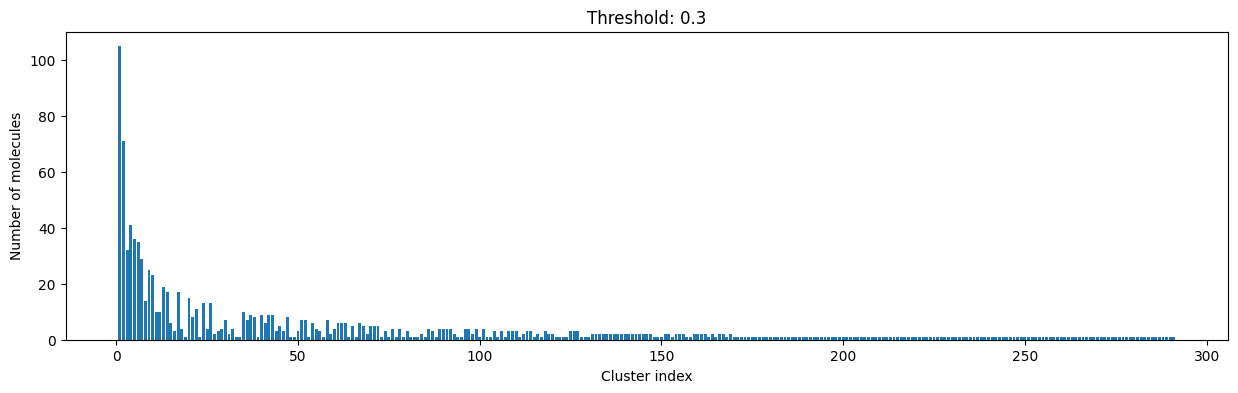

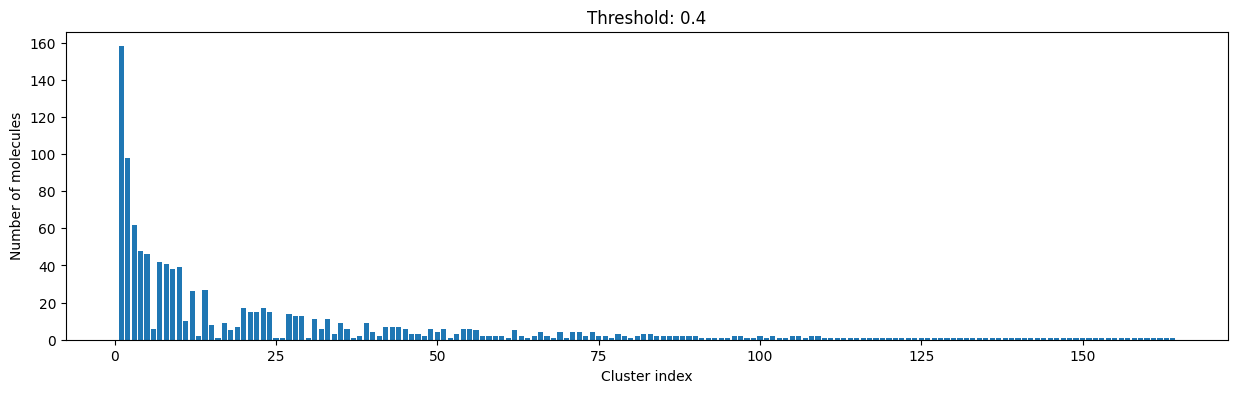

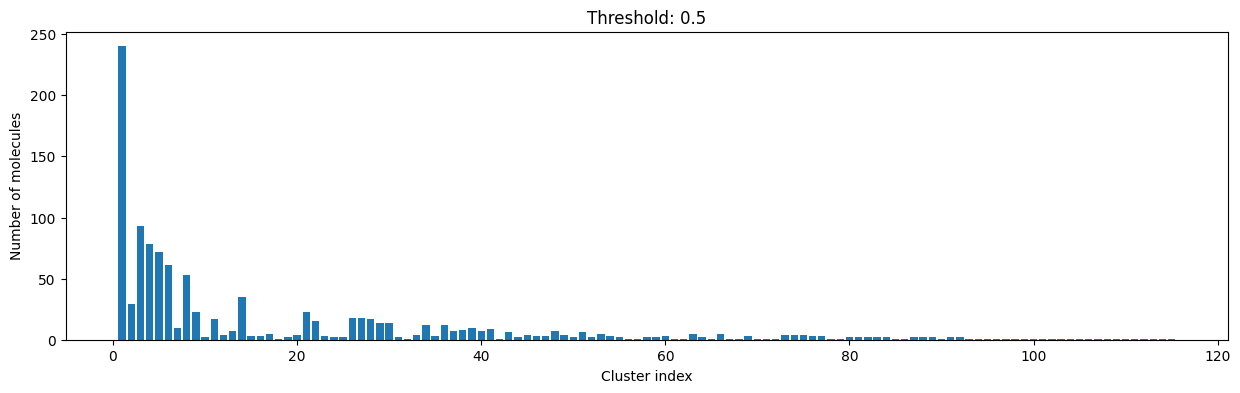

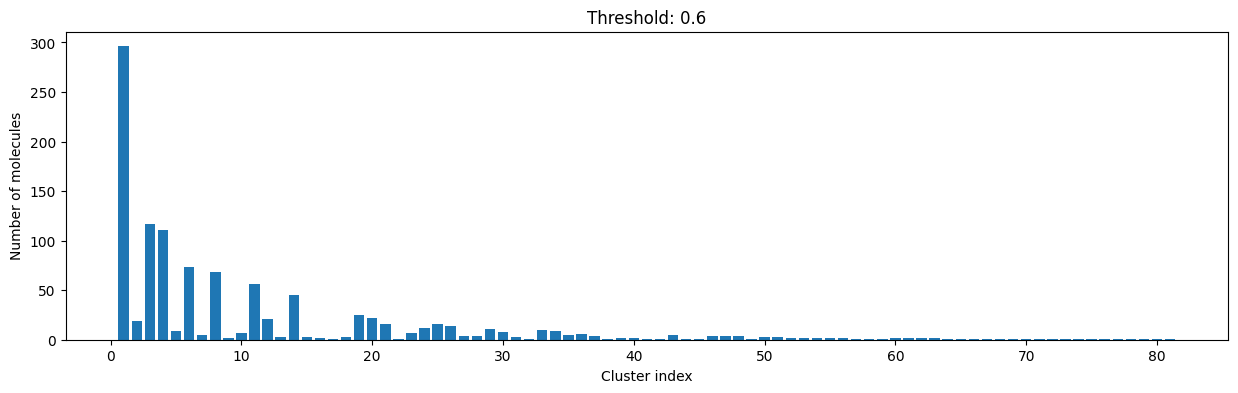

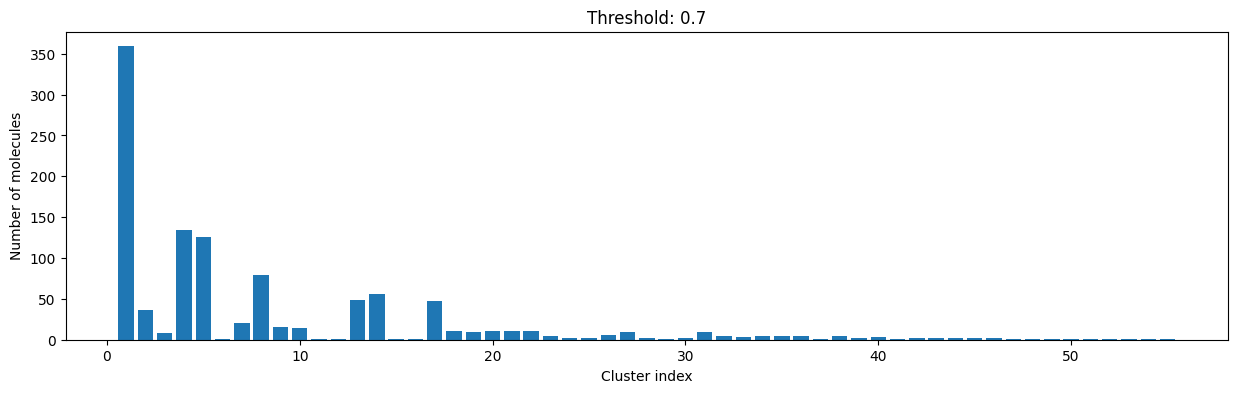

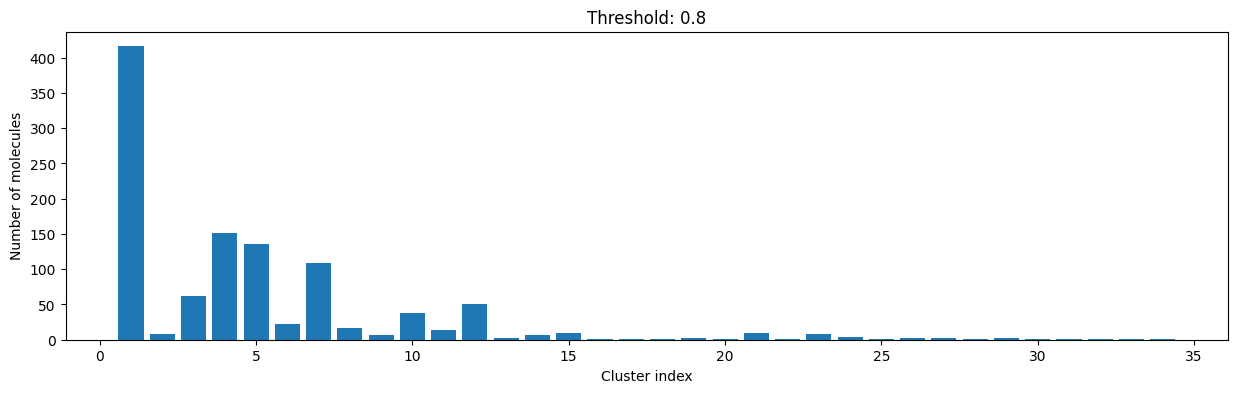

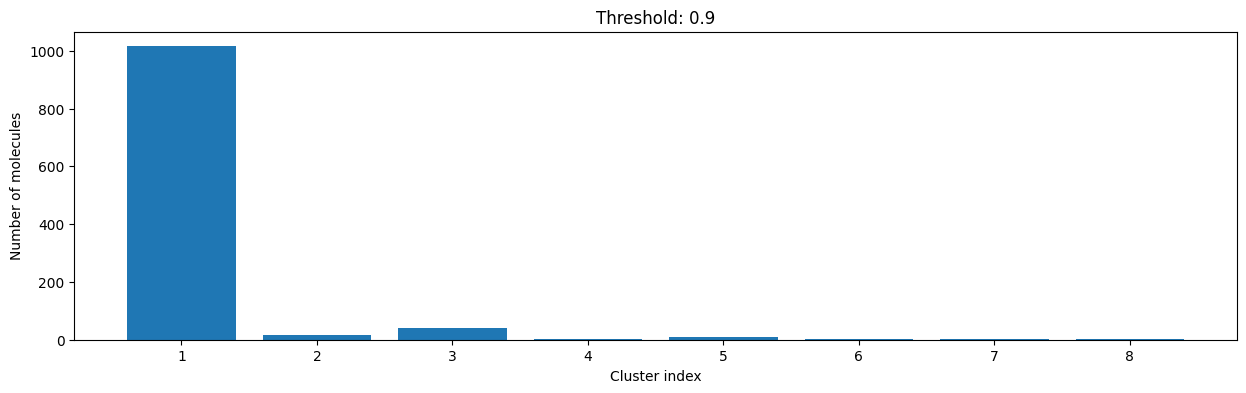

In [11]:
MorganFingerprints_tan_dist_matrix = tan_distance_matrix(MorganFingerprints)
plot_clusters(MorganFingerprints, MorganFingerprints_tan_dist_matrix)

In [12]:
MorganFingerprints_cluster = cluster(MorganFingerprints, MorganFingerprints_tan_dist_matrix, cutoff=0.2)

In [14]:
train_data = [x[0] for x in MorganFingerprints_cluster]
train_data

[725,
 818,
 495,
 487,
 781,
 493,
 110,
 1023,
 293,
 1027,
 820,
 346,
 175,
 1036,
 840,
 811,
 751,
 683,
 596,
 429,
 1017,
 819,
 720,
 704,
 286,
 959,
 895,
 700,
 628,
 556,
 478,
 309,
 262,
 251,
 88,
 1077,
 1033,
 973,
 680,
 633,
 625,
 574,
 528,
 423,
 417,
 164,
 1042,
 1038,
 1031,
 822,
 795,
 661,
 561,
 398,
 341,
 337,
 335,
 322,
 57,
 56,
 970,
 902,
 868,
 839,
 834,
 788,
 782,
 767,
 764,
 701,
 682,
 675,
 673,
 577,
 563,
 559,
 439,
 436,
 392,
 383,
 320,
 280,
 268,
 265,
 217,
 166,
 61,
 30,
 1064,
 1061,
 1058,
 1056,
 1051,
 1050,
 1004,
 956,
 921,
 860,
 835,
 824,
 806,
 800,
 785,
 738,
 708,
 702,
 685,
 651,
 605,
 586,
 575,
 547,
 485,
 466,
 464,
 424,
 413,
 395,
 386,
 380,
 373,
 348,
 321,
 299,
 283,
 278,
 259,
 231,
 226,
 194,
 180,
 128,
 116,
 111,
 107,
 43,
 41,
 1086,
 1078,
 1069,
 1011,
 1009,
 978,
 965,
 957,
 949,
 922,
 918,
 912,
 904,
 887,
 883,
 876,
 872,
 856,
 843,
 833,
 821,
 799,
 798,
 793,
 783,
 780,
 773,
 7

In [15]:
df_train = df.iloc[train_data]
df_test = df.loc[~df.index.isin(train_data)]

In [16]:
len(df_train), len(df_test)

(595, 496)

In [17]:
df_train.to_csv("df_train.csv")
df_test.to_csv("df_external_test.csv")